In [1]:
import tensorflow as tf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
tf.__version__

'2.8.0'

In [3]:
tf.config.list_logical_devices()

[LogicalDevice(name='/device:CPU:0', device_type='CPU'),
 LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [4]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
y_train_full.shape

(60000,)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
X_train_full.dtype

dtype('uint8')

## Scaling the data to make it from 0 to 1 and can easily interpret 

In [9]:
X_valid, X_train = X_train_full[:5000] / 255.0 , X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


(-0.5, 27.5, 27.5, -0.5)

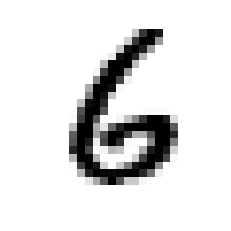

In [10]:
plt.imshow(X_train[1000], cmap="binary")
plt.axis("off")


<AxesSubplot:>

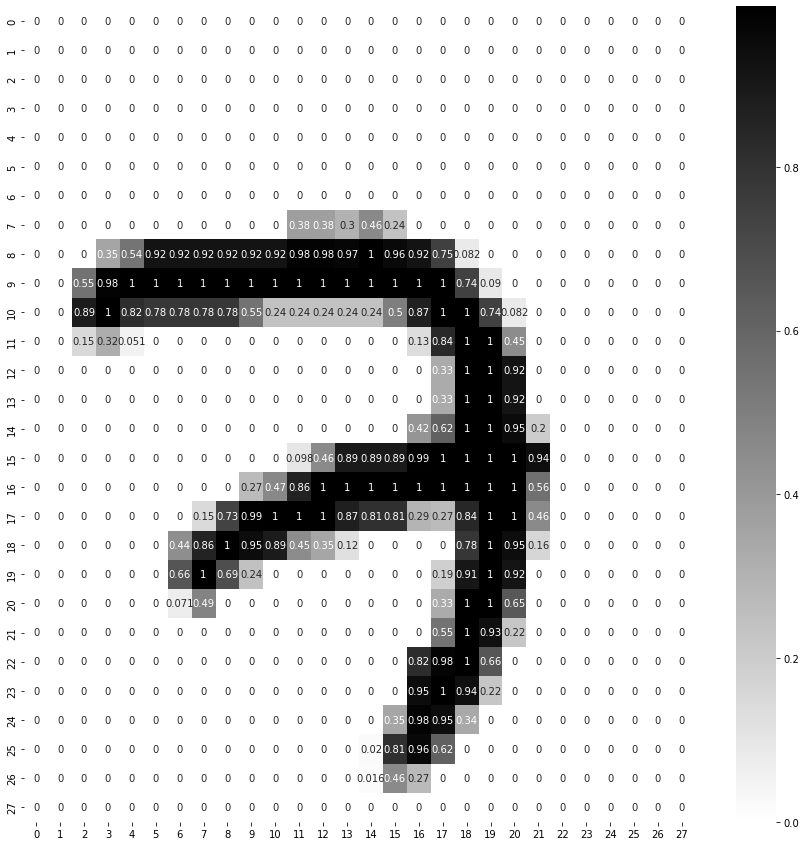

In [11]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [12]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

In [13]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [14]:
model_clf.layers

In [15]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [17]:
hidden1.get_weights()

[array([[-0.03106938, -0.06667514,  0.03588512, ..., -0.04227104,
         -0.04220577,  0.00466161],
        [-0.04660914,  0.04314753, -0.02230095, ..., -0.00242753,
         -0.04226916,  0.05231854],
        [ 0.03996826, -0.01565186, -0.05584697, ...,  0.06156579,
         -0.05794412,  0.01356946],
        ...,
        [-0.06575075, -0.04125273, -0.02787554, ...,  0.03874722,
         -0.06449067,  0.00703385],
        [-0.06226712,  0.05996123,  0.03843037, ...,  0.04618458,
         -0.02992452,  0.01610707],
        [-0.05556459,  0.02763481, -0.05597824, ...,  0.07380319,
          0.03465007,  0.0276    ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [18]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


In [19]:
import time
import os

def get_log_path(log_dir="logs/fit"):
  fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
  log_path = os.path.join(log_dir, fileName)
  print(f"saving logs at: {log_path}")
  return log_path

log_dir = get_log_path()

tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

saving logs at: logs/fit\log_2022_05_17_05_32_27


In [20]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [21]:

CKPT_path = "model_ckpt.h5"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

In [22]:
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb, early_stopping_cb,
                                                                              checkpointing_cb])


Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5956 - accuracy: 0.8489 - val_loss: 0.3052 - val_accuracy: 0.9152
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2845 - accuracy: 0.9188 - val_loss: 0.2405 - val_accuracy: 0.9308
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2316 - accuracy: 0.9347 - val_loss: 0.2017 - val_accuracy: 0.9446
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1977 - accuracy: 0.9440 - val_loss: 0.1750 - val_accuracy: 0.9532
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1718 - accuracy: 0.9510 - val_loss: 0.1597 - val_accuracy: 0.9576
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1521 - accuracy: 0.9559 - val_loss: 0.1470 - val_accuracy: 0.9582
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1359 - accuracy: 0.9610 - val_loss: 0.1321 - val_accuracy:

In [23]:
ckpt_model = tf.keras.models.load_model(CKPT_path)

history = ckpt_model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb, early_stopping_cb,
                                                                              checkpointing_cb])


Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0254 - accuracy: 0.9944 - val_loss: 0.0647 - val_accuracy: 0.9820
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0241 - accuracy: 0.9947 - val_loss: 0.0657 - val_accuracy: 0.9820
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0228 - accuracy: 0.9952 - val_loss: 0.0647 - val_accuracy: 0.9824
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0215 - accuracy: 0.9957 - val_loss: 0.0634 - val_accuracy: 0.9830
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0201 - accuracy: 0.9962 - val_loss: 0.0654 - val_accuracy: 0.9820
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0191 - accuracy: 0.9967 - val_loss: 0.0643 - val_accuracy: 0.9820
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0181 - accuracy: 0.9967 - val_loss: 0.0650 - val_accuracy:

In [24]:
import time 
import os

def savedModel_path(model_dir="TRAINED_MODEL"):
  os.makedirs(model_dir, exist_ok=True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(model_dir, fileName)
  print(f"model {fileName} will be saved at {model_path}")
  return model_path 

In [25]:
UNIQUE_PATH = savedModel_path()
UNIQUE_PATH

model Model_2022_05_17_05_35_41_.h5 will be saved at TRAINED_MODEL\Model_2022_05_17_05_35_41_.h5


'TRAINED_MODEL\\Model_2022_05_17_05_35_41_.h5'

In [26]:
tf.keras.models.save_model(model_clf, UNIQUE_PATH)

In [27]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 12.6113 - accuracy: 0.9749


[12.611261367797852, 0.9749000072479248]

In [28]:
X_new = X_test[:3]

y_prob = model_clf.predict(X_new)

y_prob.round(4)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
y_pred = np.argmax(y_prob, axis=-1)
y_pred

array([7, 2, 1], dtype=int64)

In [30]:
y_test_new = y_test[:3]
y_test_new

array([7, 2, 1], dtype=uint8)

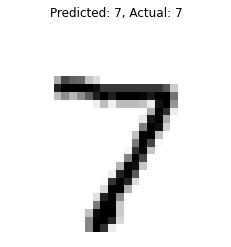

###########


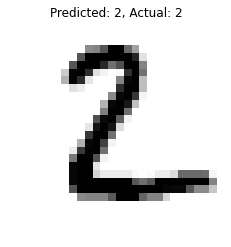

###########


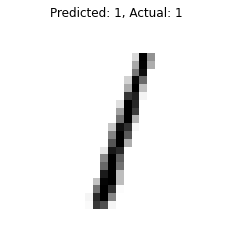

###########


In [31]:
for data, pred, actual in zip(X_new, y_pred, y_test_new):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("###########")



In [32]:
%load_ext tensorboard

In [33]:
%tensorboard --logdir logs/fit

In [34]:
%pwd

'D:\\New folder (3)\\MNIST'

In [35]:
import tensorflow
